#### Nama     : Ammar Khaq Baasir
#### Email    : ammarbaasir19@gmail.com
#### Linkedin : https://www.linkedin.com/in/ammar-baasir-973873234/
#### Github   : https://github.com/AmmarBaasir19

# Marketing A/B Testing

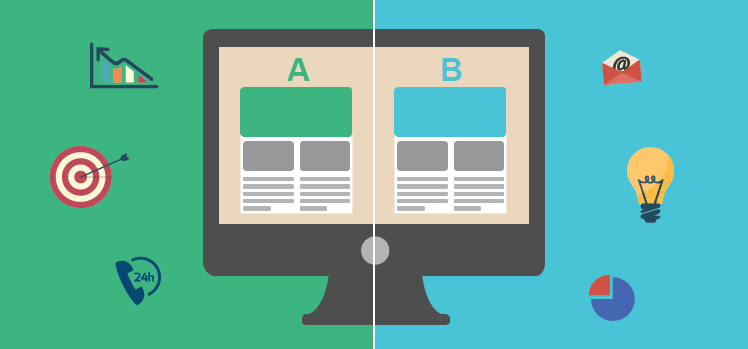

A/B Testing merupakan metode eksperimen di bidang pemasaran (marketing) yang digunakan untuk membandingkan dua versi dari suatu elemen dengan tujuan mengidentifikasi elemen mana yang memberikan hasil yang baik. 

### A/B Testing for Marketing Campaign

Dataset : https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data

Terdapat sebuah perusahaan pemasaran yang ingin menjalankan sebuah campaign diberbagai media seperti **web page, page element, banner, etc.**. perusahaan memiliki kendala dimana **biaya dari campaign sangat terbatas** perusahaan menginginkan biaya campaign yang mereka keluarkan dapat tepat sasaran (tepat kepada customer) yang benar - benar tertarik dengan campaign dan cenderung memberikan respon positif terhadap campaign mereka. masalah selanjutnya yakni perusahaan ini tidak mengetahui apakah campaign yang mereka pasang diberbagai media ini bisa berhasil? dan pada media mana campaign ini menarik perhatian para customer?. perusahaan menyadari bahwa pasar atau market mereka sangatlah kompleks dan perlu dilakukan beberapa eksperiment untuk bisa mendapatkan sebuah insight ataupun formula yang tepat. maka dari itu terciptalah sebuah ide untuk mengumpulkan data - data campaign yang telah mereka lakukan sebelumnya. data - data ini dikumpulkan untuk dilakukan analisis berdasarkan kelompok - kelompok tersebut dan untuk mengetahui apakah campaign tersebut berhasil?. selain itu, data ini diharapkan dapat memberikan informasi mengenai berapa banyak yang dapat diperoleh oleh perusahaan dari campaign tersebut, dan apakah perbedaan antar kelompok tersebut signifikan secara statistik.

#### Satge 1 : Business Problem
1. Apa problem yang ingin diselesaikan dari dataset tersebut?<br>

2. Sebagai siapa kalian pada dataset tersebut? <br>
   Answer : Data Scientist In Marketing
3. Apa goal yang ingin dicapai? <br>
   
4. Apa objective yang sesuai dengan goal tersebut?<br>

5. Apa Business Metrics yang cocok untuk mengukur ketercapaian objective tersebut?<br>


#### Stage 2 : Exploratory Data Analysis (EDA)

In [10]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Matplotlib Version : {matplotlib.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Pandas Version : 2.1.1
Numpy Version : 1.26.0
Matplotlib Version : 3.8.0
Seaborn Version : 0.13.0


#### Read Dataset

In [87]:
df = pd.read_csv('marketing_AB.csv')
df.sample(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
349258,349258,1303688,ad,False,2,Saturday,7
396667,396667,1297429,ad,False,14,Sunday,17
170048,170048,1419574,ad,False,16,Friday,16
188499,188499,1096703,ad,False,81,Monday,13
540535,540535,1546041,ad,False,1,Monday,9


In [88]:
df = df.drop(['Unnamed: 0'], axis=1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [90]:
df_value = df.drop(df[['user id', 'total ads']], axis=1)
for column in df_value.columns:
    print(f"Columns : \033[1m{column}\033[0m")
    print(f"Value Counts : {df_value[column].value_counts()}")
    print()

Columns : test group
Value Counts : test group
ad     564577
psa     23524
Name: count, dtype: int64

Columns : converted
Value Counts : converted
False    573258
True      14843
Name: count, dtype: int64

Columns : most ads day
Value Counts : most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64

Columns : most ads hour
Value Counts : most ads hour
13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: count, dtype: int64



userid merepresentasikan bahwa 1 user id merupakan 1 user (customer) dan tidak terdapat userid yang duplicated

In [91]:
df_test_group = df.groupby(['test group', 'converted'])['user id'].count().reset_index()
df_test_group['converted'].replace(False, 'No', inplace=True)
df_test_group['converted'].replace(True, 'Yes', inplace=True)
df_test_group

,test group,converted,user id
0,ad,No,550154
1,ad,Yes,14423
2,psa,No,23104
3,psa,Yes,420


In [92]:
tot_user = df_test_group.groupby('test group')['user id'].sum().reset_index()
tot_user

,test group,user id
0,ad,564577
1,psa,23524


In [93]:
df_test_group = df_test_group.merge(tot_user, on='test group', suffixes=('', '_total'))
df_test_group

,test group,converted,user id,user id_total
0,ad,No,550154,564577
1,ad,Yes,14423,564577
2,psa,No,23104,23524
3,psa,Yes,420,23524


In [95]:
df_test_group['percentage'] = round(((df_test_group['user id']/df_test_group['user id_total']) * 100), 2)
df_test_group

,test group,converted,user id,user id_total,percentage
0,ad,No,550154,564577,97.45
1,ad,Yes,14423,564577,2.55
2,psa,No,23104,23524,98.21
3,psa,Yes,420,23524,1.79


In [99]:
df_test_stack = df_test_group.pivot_table(index='test group', columns='converted', values='percentage')
df_test_stack

converted,No,Yes
test group,,
ad,97.45,2.55
psa,98.21,1.79


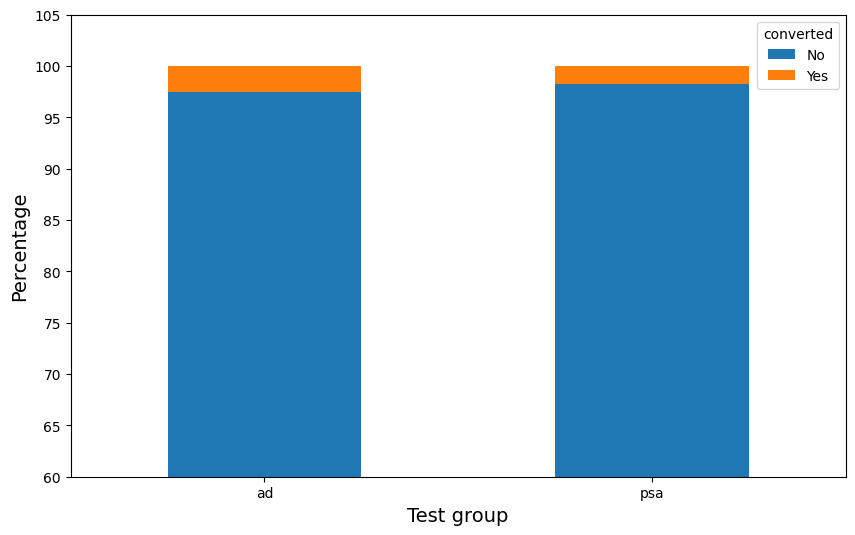

In [178]:
df_test_stack.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Test group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(60, 105)

plt.xticks(rotation=0)
plt.show()

In [122]:
df_test_ad = df_test_group[df_test_group['test group'] == 'ad']
df_test_ad

,test group,converted,user id,user id_total,percentage
0,ad,No,550154,564577,97.45
1,ad,Yes,14423,564577,2.55


In [134]:
df_test_psa = df_test_group[df_test_group['test group'] == 'psa']
df_test_psa

,test group,converted,user id,user id_total,percentage
2,psa,No,23104,23524,98.21
3,psa,Yes,420,23524,1.79


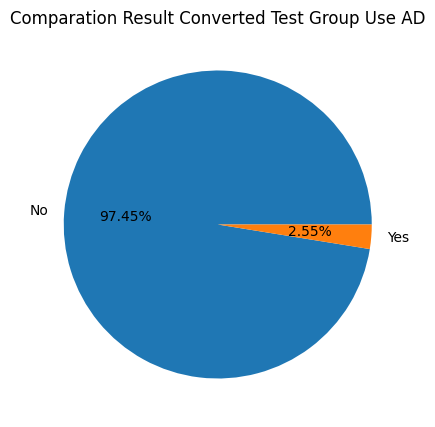

In [133]:
plt.figure(figsize=(8, 5))
plt.pie(df_test_ad['percentage'], 
        labels=df_test_ad['converted'], 
        autopct='%1.2f%%')

plt.title('Comparation Result Converted Test Group Use AD')
plt.show()

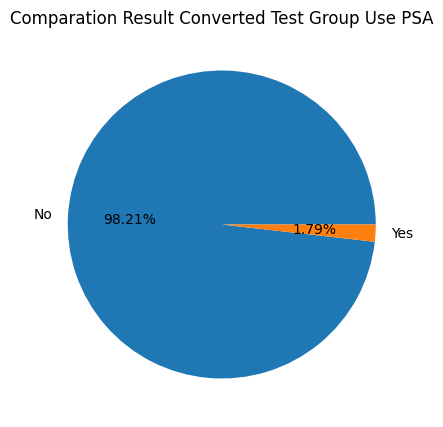

In [145]:
plt.figure(figsize=(8, 5))
plt.pie(df_test_psa['percentage'], 
        labels=df_test_psa['converted'], 
        autopct='%1.2f%%') 

plt.title('Comparation Result Converted Test Group Use PSA')
plt.show()

In [152]:
df_most_day1 = df.groupby(['most ads day', 'converted'])['user id'].count().reset_index()
df_most_day1

,most ads day,converted,user id
0,Friday,False,90551
1,Friday,True,2057
2,Monday,False,84216
3,Monday,True,2857
4,Saturday,False,79941
5,Saturday,True,1719
6,Sunday,False,83301
7,Sunday,True,2090
8,Thursday,False,81192
9,Thursday,True,1790


In [154]:
df_most_day = df_most_day1.pivot_table(index='most ads day', columns='converted', values='user id')
df_most_day

converted,False,True
most ads day,,
Friday,90551.0,2057.0
Monday,84216.0,2857.0
Saturday,79941.0,1719.0
Sunday,83301.0,2090.0
Thursday,81192.0,1790.0
Tuesday,75167.0,2312.0
Wednesday,78890.0,2018.0


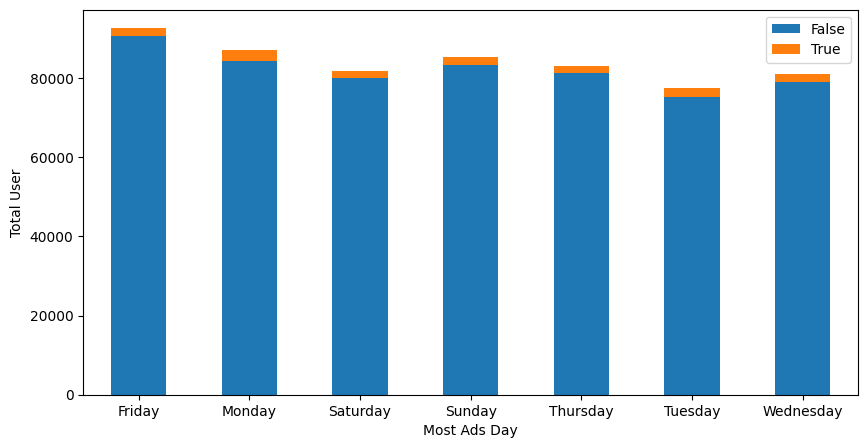

In [164]:
df_most_day.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.xticks(rotation=0)
plt.xlabel('Most Ads Day')
plt.ylabel('Total User')
plt.legend()
plt.show()

In [87]:
df_most_hour = df.groupby(['most ads hour', 'converted'])['user id'].count().reset_index()
df_most_hour

,most ads hour,converted,user id
0,0,False,5434
1,0,True,102
2,1,False,4740
3,1,True,62
4,2,False,5294
5,2,True,39
6,3,False,2651
7,3,True,28
8,4,False,711
9,4,True,11


#### Stage 3 : Data Pre-Processing

#### Stage 4 : A/B Testing

#### Stage 5 : Insight Business